In [3]:
import pandas as pd


In [4]:
titanic = pd.read_csv("data/titanic.csv")


In [5]:
titanic.head()

Unnamed: 0  pclass  survived  \
0           1     1.0       1.0   
1           2     1.0       1.0   
2           3     1.0       0.0   
3           4     1.0       0.0   
4           5     1.0       0.0   

                                              name     sex      age  sibsp  \
0                    Allen, Miss. Elisabeth Walton  female  29.0000    0.0   
1                   Allison, Master. Hudson Trevor    male   0.9167    1.0   
2                     Allison, Miss. Helen Loraine  female   2.0000    1.0   
3             Allison, Mr. Hudson Joshua Creighton    male  30.0000    1.0   
4  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0000    1.0   

   parch  ticket      fare    cabin embarked boat   body  \
0    0.0   24160  211.3375       B5        S    2    NaN   
1    2.0  113781  151.5500  C22 C26        S   11    NaN   
2    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  has_cabin_number  
0                     St Louis, MO                 1  
1  Montreal, PQ / Chesterville, ON                 1  
2  Montreal, PQ / Chesterville, ON                 1  
3  Montreal, PQ / Chesterville, ON                 1  
4  Montreal, PQ / Chesterville, ON                 1

In [6]:
cols = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
titanic = titanic[cols].dropna()

In [7]:
titanic.head(3)

survived  pclass     sex      age  sibsp  parch      fare embarked
0       1.0     1.0  female  29.0000    0.0    0.0  211.3375        S
1       1.0     1.0    male   0.9167    1.0    2.0  151.5500        S
2       0.0     1.0  female   2.0000    1.0    2.0  151.5500        S

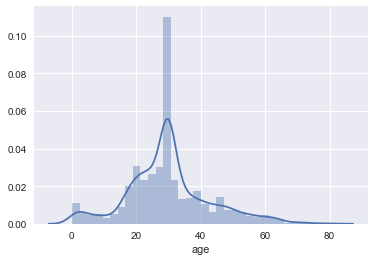

In [8]:
# use seaborn for KDE (kerna density estimation)
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.distplot(titanic["age"])
plt.show()

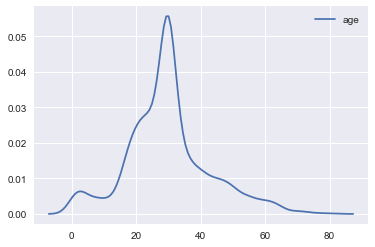

In [9]:
sns.kdeplot(titanic["age"])

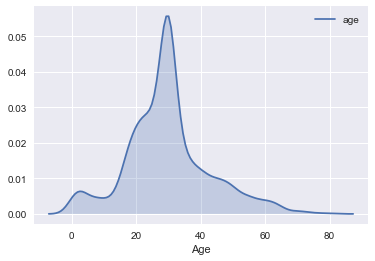

In [10]:
# shade the area under the smooth cureve
sns.kdeplot(titanic["age"], shade = True)
plt.xlabel("Age")
plt.show()

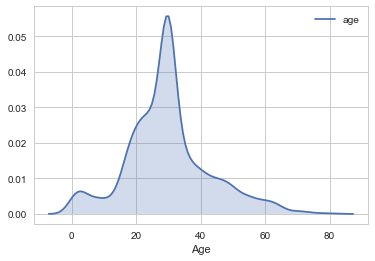

In [11]:
sns.set_style("whitegrid")
sns.kdeplot(titanic["age"], shade = True)
plt.xlabel("Age")
plt.show()

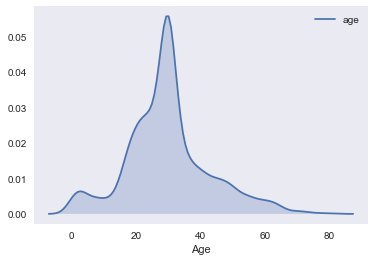

In [12]:
sns.set_style("dark")
sns.kdeplot(titanic["age"], shade = True)
plt.xlabel("Age")
plt.show()

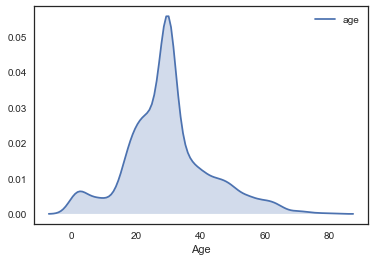

In [13]:
sns.set_style("white")
sns.kdeplot(titanic["age"], shade = True)
plt.xlabel("Age")
plt.show()

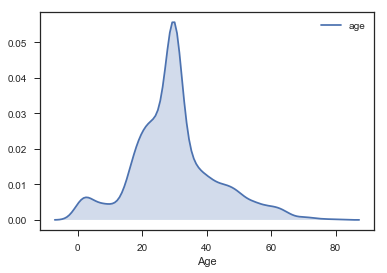

In [14]:
sns.set_style("ticks")
sns.kdeplot(titanic["age"], shade = True)
plt.xlabel("Age")
plt.show()

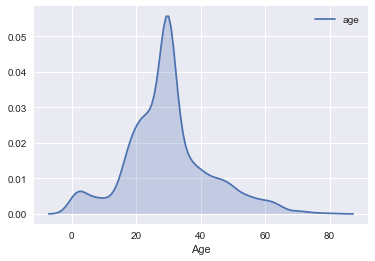

In [15]:
sns.set_style("darkgrid") # default style
sns.kdeplot(titanic["age"], shade = True)
plt.xlabel("Age")
plt.show()

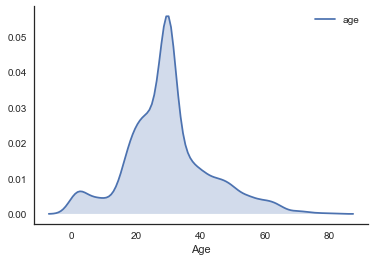

In [16]:
# remove splines
sns.set_style("white")
sns.kdeplot(titanic["age"], shade = True)
sns.despine() # by default it removes top and right 
plt.xlabel("Age")

plt.show()

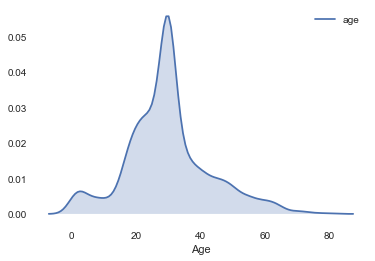

In [17]:

sns.kdeplot(titanic["age"], shade = True)
sns.set_style("white")
sns.despine(left = True, bottom =True)
plt.xlabel("Age")
plt.show()



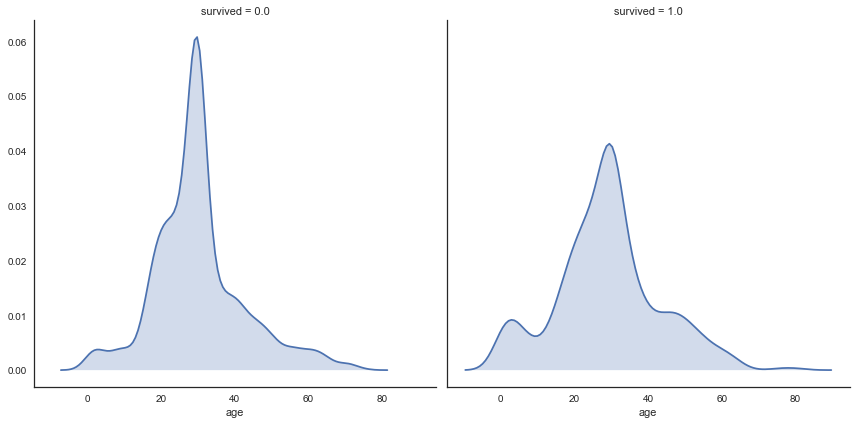

In [18]:
# Condition on unique values of the "Survived" column.
g = sns.FacetGrid(titanic, col="survived", size=6)
# For each subset of values, generate a kernel density plot of the "Age" columns.
g.map(sns.kdeplot, "age", shade=True)

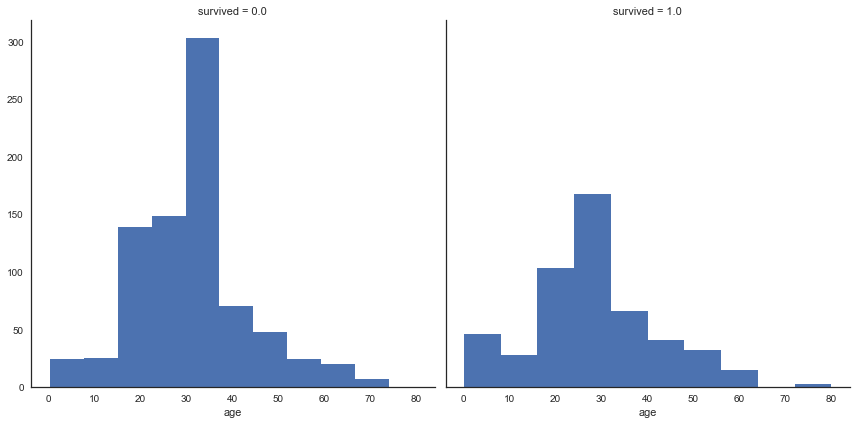

In [19]:
g = sns.FacetGrid(titanic, col="survived", size=6)
g.map(plt.hist, "age")

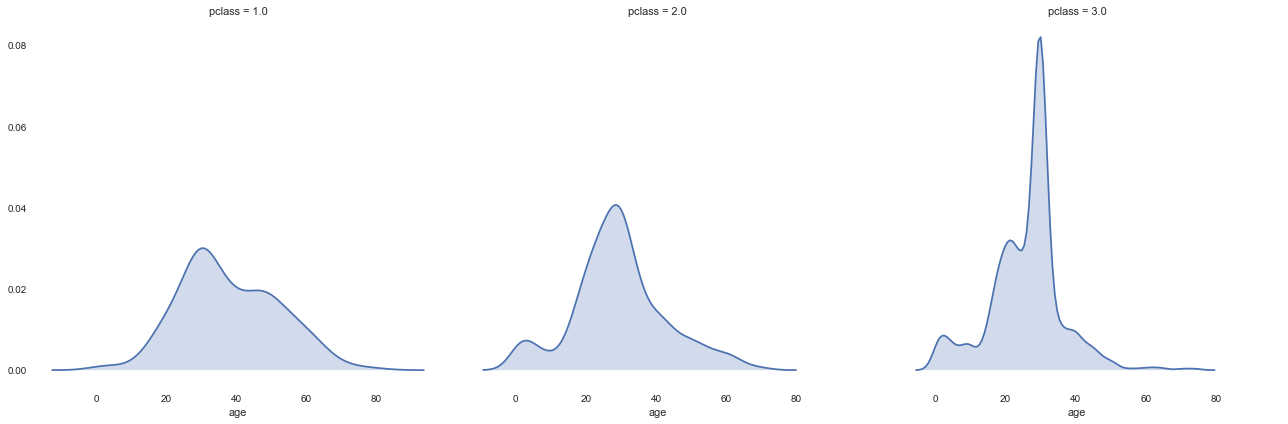

In [20]:
# facetgrid using pclass
g=sns.FacetGrid(titanic, col="pclass", size =6)
g.map(sns.kdeplot, "age", shade = True)
sns.despine(left = True, bottom = True)
plt.show()

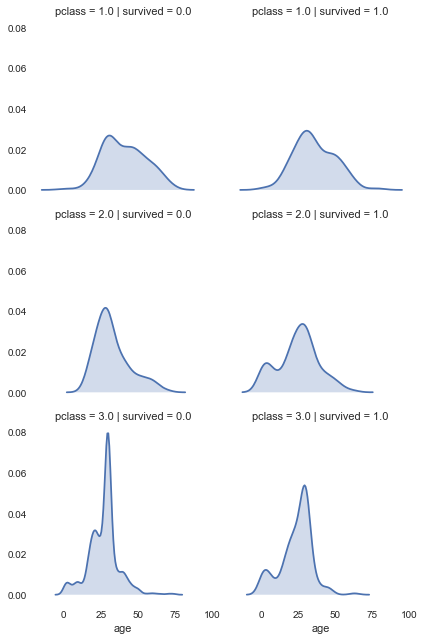

In [21]:
# subset based on selection from two columns
g = sns.FacetGrid(titanic, col="survived", row="pclass")
g.map(sns.kdeplot, "age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

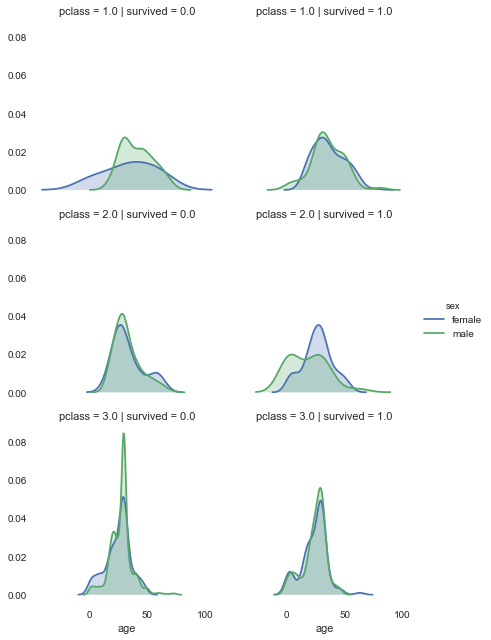

In [22]:
# add more columns thru color - 'hue'
g = sns.FacetGrid(titanic, col = "survived", row ="pclass", hue="sex", size = 3)
g.map(sns.kdeplot, "age",shade = True)

g.add_legend()
sns.despine(left = True, bottom=True)

plt.show()

        survived
sex             
female  0.727468
male    0.191211


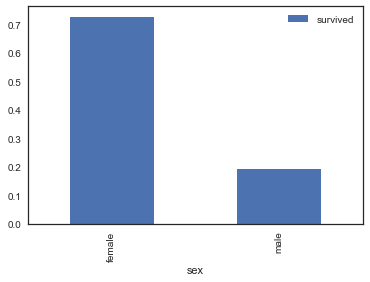

In [23]:
sex_pivot = titanic.pivot_table(index="sex",values="survived")
print(sex_pivot)
sex_pivot.plot.bar()
plt.show()

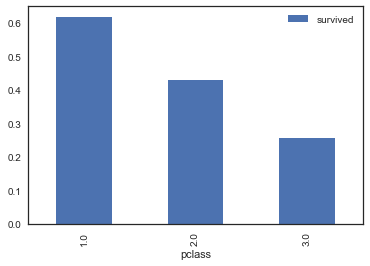

In [24]:
pclass_pivot = titanic.pivot_table(index="pclass",values="survived")
pclass_pivot.plot.bar()
plt.show()

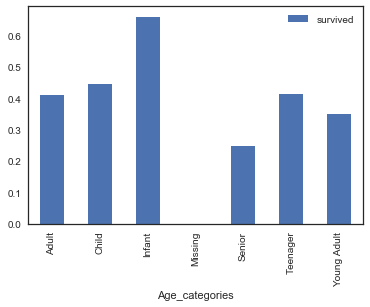

In [25]:
def process_age(df,cut_points,label_names):
    df["age"] = df["age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ['Missing', 'Infant', 'Child','Teenager', 'Young Adult', 'Adult', 'Senior']

titanic = process_age(titanic, cut_points, label_names)

age_pivot = titanic.pivot_table(index = 'Age_categories', values='survived' )
age_pivot.plot.bar()
plt.show()

In [26]:
# use pd.get_dummy to create dummy columns for Pclass, sex, Age_categories

def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

titanic = create_dummies(titanic,"pclass")

titanic = create_dummies(titanic,"sex")

titanic = create_dummies(titanic,"Age_categories")


In [27]:
titanic.head(3)

survived  pclass     sex      age  sibsp  parch      fare embarked  \
0       1.0     1.0  female  29.0000    0.0    0.0  211.3375        S   
1       1.0     1.0    male   0.9167    1.0    2.0  151.5500        S   
2       0.0     1.0  female   2.0000    1.0    2.0  151.5500        S   

  Age_categories  pclass_1.0             ...              pclass_3.0  \
0    Young Adult           1             ...                       0   
1         Infant           1             ...                       0   
2         Infant           1             ...                       0   

   sex_female  sex_male  Age_categories_Adult  Age_categories_Child  \
0           1         0                     0                     0   
1           0         1                     0                     0   
2           1         0                     0                     0   

   Age_categories_Infant  Age_categories_Missing  Age_categories_Senior  \
0                      0                       0                      0   
1                      1                       0                      0   
2                      1                       0                      0   

   Age_categories_Teenager  Age_categories_Young Adult  
0                        0                           1  
1                        0                           0  
2                        0                           0  

[3 rows x 21 columns]

In [28]:
columns = ['pclass_1.0', 'pclass_2.0', 'pclass_3.0', 'sex_female', 'sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(titanic[columns], titanic['survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
#holdout = test # from now on we will refer to this
               # dataframe as the holdout data

from sklearn.model_selection import train_test_split


all_X = titanic[columns]
all_y = titanic['survived']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.2,random_state=0)

In [30]:
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, predictions)

In [32]:
print(accuracy)

0.782442748092


In [33]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy = np.mean(scores)
print(scores)
print(accuracy)

[ 0.42748092  0.77099237  0.84732824  0.77862595  0.80916031  0.79389313
  0.74045802  0.67175573  0.73076923  0.73846154]
0.730892542572


In [34]:
lr = LogisticRegression()
lr.fit(all_X,all_y)
holdout_predictions = lr.predict(titanic[columns])

In [35]:
print(holdout_predictions)

[ 1.  1.  1. ...,  0.  0.  0.]


In [40]:
#holdout_ids = titanic["passengerid"]
holdout_ids = titanic["age"]

#submission_df = {"PassengerId": holdout_ids,
#                 "Survived": holdout_predictions}
survival_df = {"age":holdout_ids,"Survived":holdout_predictions}


In [41]:
survival_df = pd.DataFrame(survival_df)

In [42]:
survival_df.head()

Survived      age
0       1.0  29.0000
1       1.0   0.9167
2       1.0   2.0000
3       0.0  30.0000
4       1.0  25.0000

In [43]:
survival_df.to_csv("submission.csv",index = False)